In [1]:
import json
import numpy as np
import matplotlib.pyplot as plt

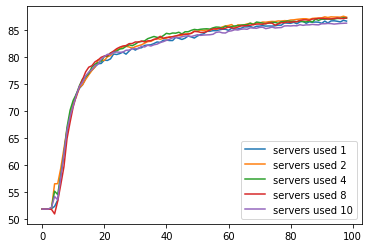

In [2]:
total_gradient_time = []
total_acc=[]
std_acc=[]
for idx in [1,2,4,8, 10]:
    s10w1_1 = json.load(open("results/servers_"+str(idx)+"_workerss_1_try_1.json"))
    s10w1_2 = json.load(open("results/servers_"+str(idx)+"_workerss_1_try_2.json"))
    s10w1_3 = json.load(open("results/servers_"+str(idx)+"_workerss_1_try_3.json"))
    tot_time = (np.array(s10w1_1["total_time"][1:])+np.array(s10w1_2["total_time"][1:])+np.array(s10w1_2["total_time"][1:]))/3
    tot_acc = (np.array(s10w1_1["accuracy"][1:])+np.array(s10w1_2["accuracy"][1:])+np.array(s10w1_2["accuracy"][1:]))/3
    plt.plot(tot_acc, label="servers used "+str(idx))
    total_gradient_time.append(np.mean(tot_time))
    val = [np.max(s10w1_1["accuracy"]), np.max(s10w1_2["accuracy"]), np.max(s10w1_3["accuracy"])]
    total_acc.append(np.mean([val]))
    std_acc.append(np.std(val))
    
plt.legend()


In [3]:
s10w1_1.keys()

dict_keys(['total_time', 'gradient_time', 'accuracy'])

Text(0, 0.5, 'Gradient update time to parameter server')

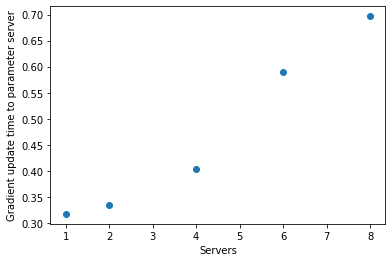

In [4]:
plt.scatter([1,2,4,6,8], total_gradient_time)
plt.xlabel("Servers")
plt.ylabel("Gradient update time to parameter server")

Text(0, 0.5, 'Accuracy')

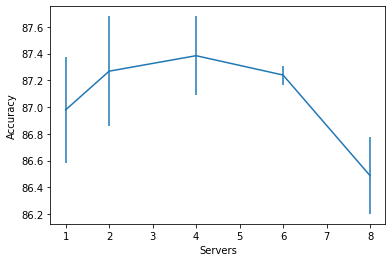

In [5]:
plt.errorbar([1,2,4,6,8], total_acc, std_acc)
plt.xlabel("Servers")
plt.ylabel("Accuracy")

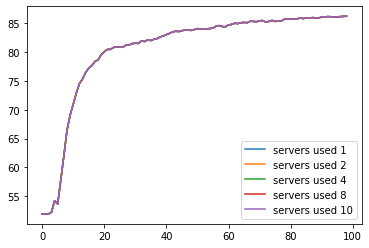

In [6]:
total_gradient_time_w = []
total_acc_w =[]
std_acc_w =[]
for idx in [1,2,4,8,10]:
    s10w1_1 = json.load(open("results/servers_1_workerss_"+str(idx)+"_try_1.json"))
    s10w1_2 = json.load(open("results/servers_1_workerss_"+str(idx)+"_try_2.json"))
    s10w1_3 = json.load(open("results/servers_1_workerss_"+str(idx)+"_try_3.json"))
    tot_time = (np.array(s10w1_1["total_time"][1:])+np.array(s10w1_2["total_time"][1:])+np.array(s10w1_2["total_time"][1:]))/3
    total_acc = (np.array(s10w1_1["accuracy"])+np.array(s10w1_2["accuracy"])+np.array(s10w1_2["accuracy"]))/3
    plt.plot(tot_acc, label="servers used "+str(idx))
    total_gradient_time_w.append(np.mean(tot_time))
    val = [np.max(s10w1_1["accuracy"]), np.max(s10w1_2["accuracy"]), np.max(s10w1_3["accuracy"])]
    total_acc_w.append(np.mean([val]))
    std_acc_w.append(np.std(val))
    
plt.legend()

Text(0, 0.5, 'Gradient update time to parameter server')

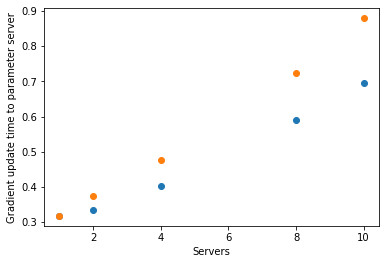

In [7]:
plt.scatter([1,2,4,8,10], total_gradient_time)
plt.scatter([1,2,4,8,10], total_gradient_time_w)
plt.xlabel("Servers")
plt.ylabel("Gradient update time to parameter server")

Text(0, 0.5, 'Gradient update time to parameter server')

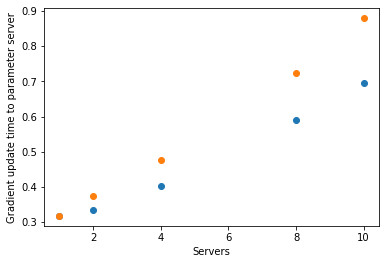

In [8]:
plt.scatter([1,2,4,8,10], total_gradient_time)
plt.scatter([1,2,4,8,10], total_gradient_time_w)
plt.xlabel("Servers")
plt.ylabel("Gradient update time to parameter server")

In [9]:
total_gradient_time

[0.31736541463282397,
 0.33443265974163294,
 0.4034086877533652,
 0.5900869810668803,
 0.6967548382783939]

In [10]:
total_gradient_time_w

[0.31736541463282397,
 0.37527692755939335,
 0.4751893922975244,
 0.722431864353045,
 0.8795415362916792]